In [1]:
!pip install augmentts

Defaulting to user installation because normal site-packages is not writeable


In [14]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from Data_Augmentation.vpower_src.utils.auxiliary_functions import *

from augmentts.augmenters.vae import LSTMVAE, VAEAugmenter
from augmentts.forecasters.deep import LSTMCNNForecaster
from augmentts.utils import prepare_ts


In [3]:
torch.cuda.is_available()

True

In [4]:
#data_dir_s =  "../../Data/synthetic_data"
data_dir_r =  "../../Data/split_quad"
#data_dir_da = "../../Data/augmented_data"
#data_tag="RD"

In [5]:
data_all = {}

for partition in ["train", "test", "val", "lourd"]:
    df = load_data_and_set_index(filepath=os.path.join(data_dir_r, f"{partition}.csv"), index_column_name="index")
    data_all[partition+"_r"] = df

data_all["train"]=data_all["train_r"]
data_all["test"]=data_all["test_r"]

In [6]:
input_features = [
    #time_start,
    "flight",
    "time",
    "wind_speed",
    "wind_angle",
    #battery_voltage,
    #battery_current,
    #position_x,
    #position_y,
    "position_z",
    "orientation_x",
    "orientation_y",
    "orientation_z",
    "orientation_w",
    "velocity_x",
    "velocity_y",
    "velocity_z",
    "angular_x",
    "angular_y",
    "angular_z",
    "linear_acceleration_x",
    "linear_acceleration_y",
    "linear_acceleration_z",
    #speed,
    #payload,
    #altitude,
    #route,
    #power,
    "power_smoothed"
]


In [7]:
data_all_features = {}
data_all_features["train"] = pd.DataFrame(data_all["train"][input_features])
data_all_features["test"] = pd.DataFrame(data_all["test"][input_features])

In [8]:
real_data = data_all_features["train"]
print("Real_Data Length: ", len(real_data))

Real_Data Length:  139006


In [9]:
# Create variational autoencoder
vae = LSTMVAE(series_len=19)

# Create an augmenter
augmenter = VAEAugmenter(vae)


In [10]:

# augmenter.fit(torch.from_numpy(real_data.to_numpy()), epochs = 50, batch_size = 32)
# torch.from_numpy(real_data.to_numpy())

In [54]:
#augmenter.fit(np.random.normal(size=(40,1,100)), epochs=10, batch_size=32)
real_data_val = real_data.values
real_data_reshape = real_data_val.reshape(-1, 1, 19)
augmenter.fit(real_data_reshape, epochs=50, batch_size=1000)

Epoch 1/50
140/140 [==============================] - 14s 102ms/step - loss: 5024337.1596 - reconstruction_loss: 4837769.0000 - kl_loss: 0.0142
Epoch 2/50
140/140 [==============================] - 14s 102ms/step - loss: 4436323.8014 - reconstruction_loss: 4286114.0000 - kl_loss: 0.0142
Epoch 3/50
140/140 [==============================] - 14s 103ms/step - loss: 3945137.3652 - reconstruction_loss: 3815095.7500 - kl_loss: 0.0143
Epoch 4/50
140/140 [==============================] - 14s 102ms/step - loss: 3538628.3652 - reconstruction_loss: 3414400.0000 - kl_loss: 0.0143
Epoch 5/50
140/140 [==============================] - 14s 102ms/step - loss: 3181726.7535 - reconstruction_loss: 3075153.5000 - kl_loss: 0.0144
Epoch 6/50
140/140 [==============================] - 14s 101ms/step - loss: 2876916.9645 - reconstruction_loss: 2789462.7500 - kl_loss: 0.0144
Epoch 7/50
140/140 [==============================] - 14s 102ms/step - loss: 2625557.1330 - reconstruction_loss: 2550357.7500 - kl_loss:

In [55]:
new_data1 = augmenter.sample(n=1000)

In [56]:
new_data2 = augmenter.sample(X=real_data_reshape)

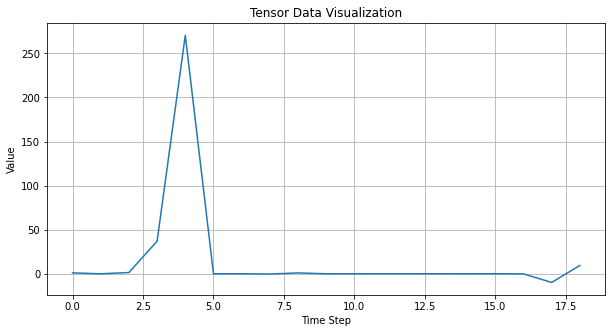

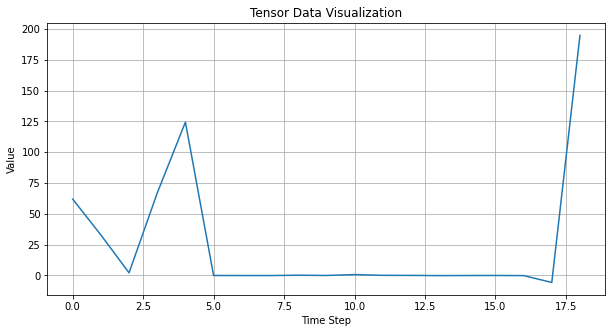

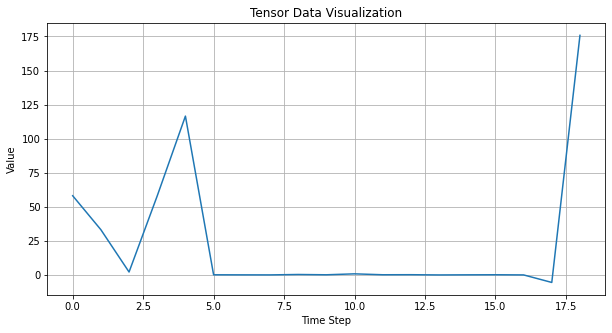

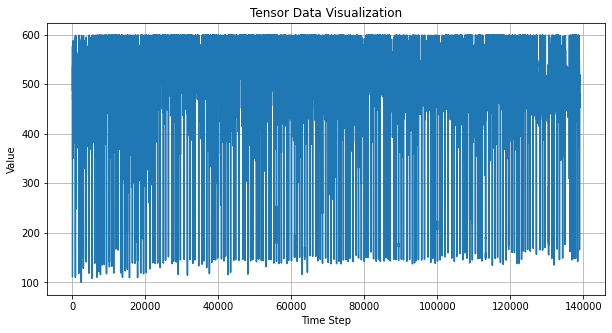

: 

In [75]:
import tensorflow as tf

tensor0 = tf.constant(real_data_reshape)
data_array0 = tensor0.numpy()
data_to_plot0 = data_array0[0, :, :]
data_to_plot0 = data_to_plot0.squeeze()
x_values0 = range(data_to_plot0.shape[0])

plt.figure(figsize=(10,5))
plt.plot(x_values0, data_to_plot0)
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.title("Tensor Data Visualization")
plt.grid(True)
plt.show()

tensor1 = tf.constant(new_data1)
data_array1 = tensor1.numpy()
data_to_plot1 = data_array1[0, :, :]
data_to_plot1 = data_to_plot1.squeeze()
x_values1 = range(data_to_plot1.shape[0])

plt.figure(figsize=(10,5))
plt.plot(x_values1, data_to_plot1)
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.title("Tensor Data Visualization")
plt.grid(True)
plt.show()

tensor1 = tf.constant(new_data1)
data_array1 = tensor1.numpy()
data_to_plot1 = data_array1[999, :, :]
data_to_plot1 = data_to_plot1.squeeze()
x_values1 = range(data_to_plot1.shape[0])

plt.figure(figsize=(10,5))
plt.plot(x_values1, data_to_plot1)
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.title("Tensor Data Visualization")
plt.grid(True)
plt.show()


tensor2 = tf.constant(new_data2)
data_array2 = tensor2.numpy()
data_to_plot2 = data_array2[:, :, 18]
data_to_plot2 = data_to_plot2.squeeze()
x_values2 = range(data_to_plot2.shape[0])

plt.figure(figsize=(10,5))
plt.plot(x_values2, data_to_plot2)
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.title("Tensor Data Visualization")
plt.grid(True)
plt.show()


In [74]:
data_array2[:,:,18]

array([[111.53832],
       [178.76085],
       [118.73302],
       ...,
       [230.68855],
       [241.9337 ],
       [166.11748]], dtype=float32)